**Aggressive Portfolio - Jupyter Notebook, Python 3.12.1, September 2024**

In [110]:
import yfinance as yf
import pandas as pd
import ffn as ffn
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [111]:
# Download historical data for the SP500 Net Total Return with specified dates
sp_data = yf.download('^SP500TR', start='1990-01-01', end='2024-09-18')

[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


First available date for CSNDX.SW: 2010-01-26


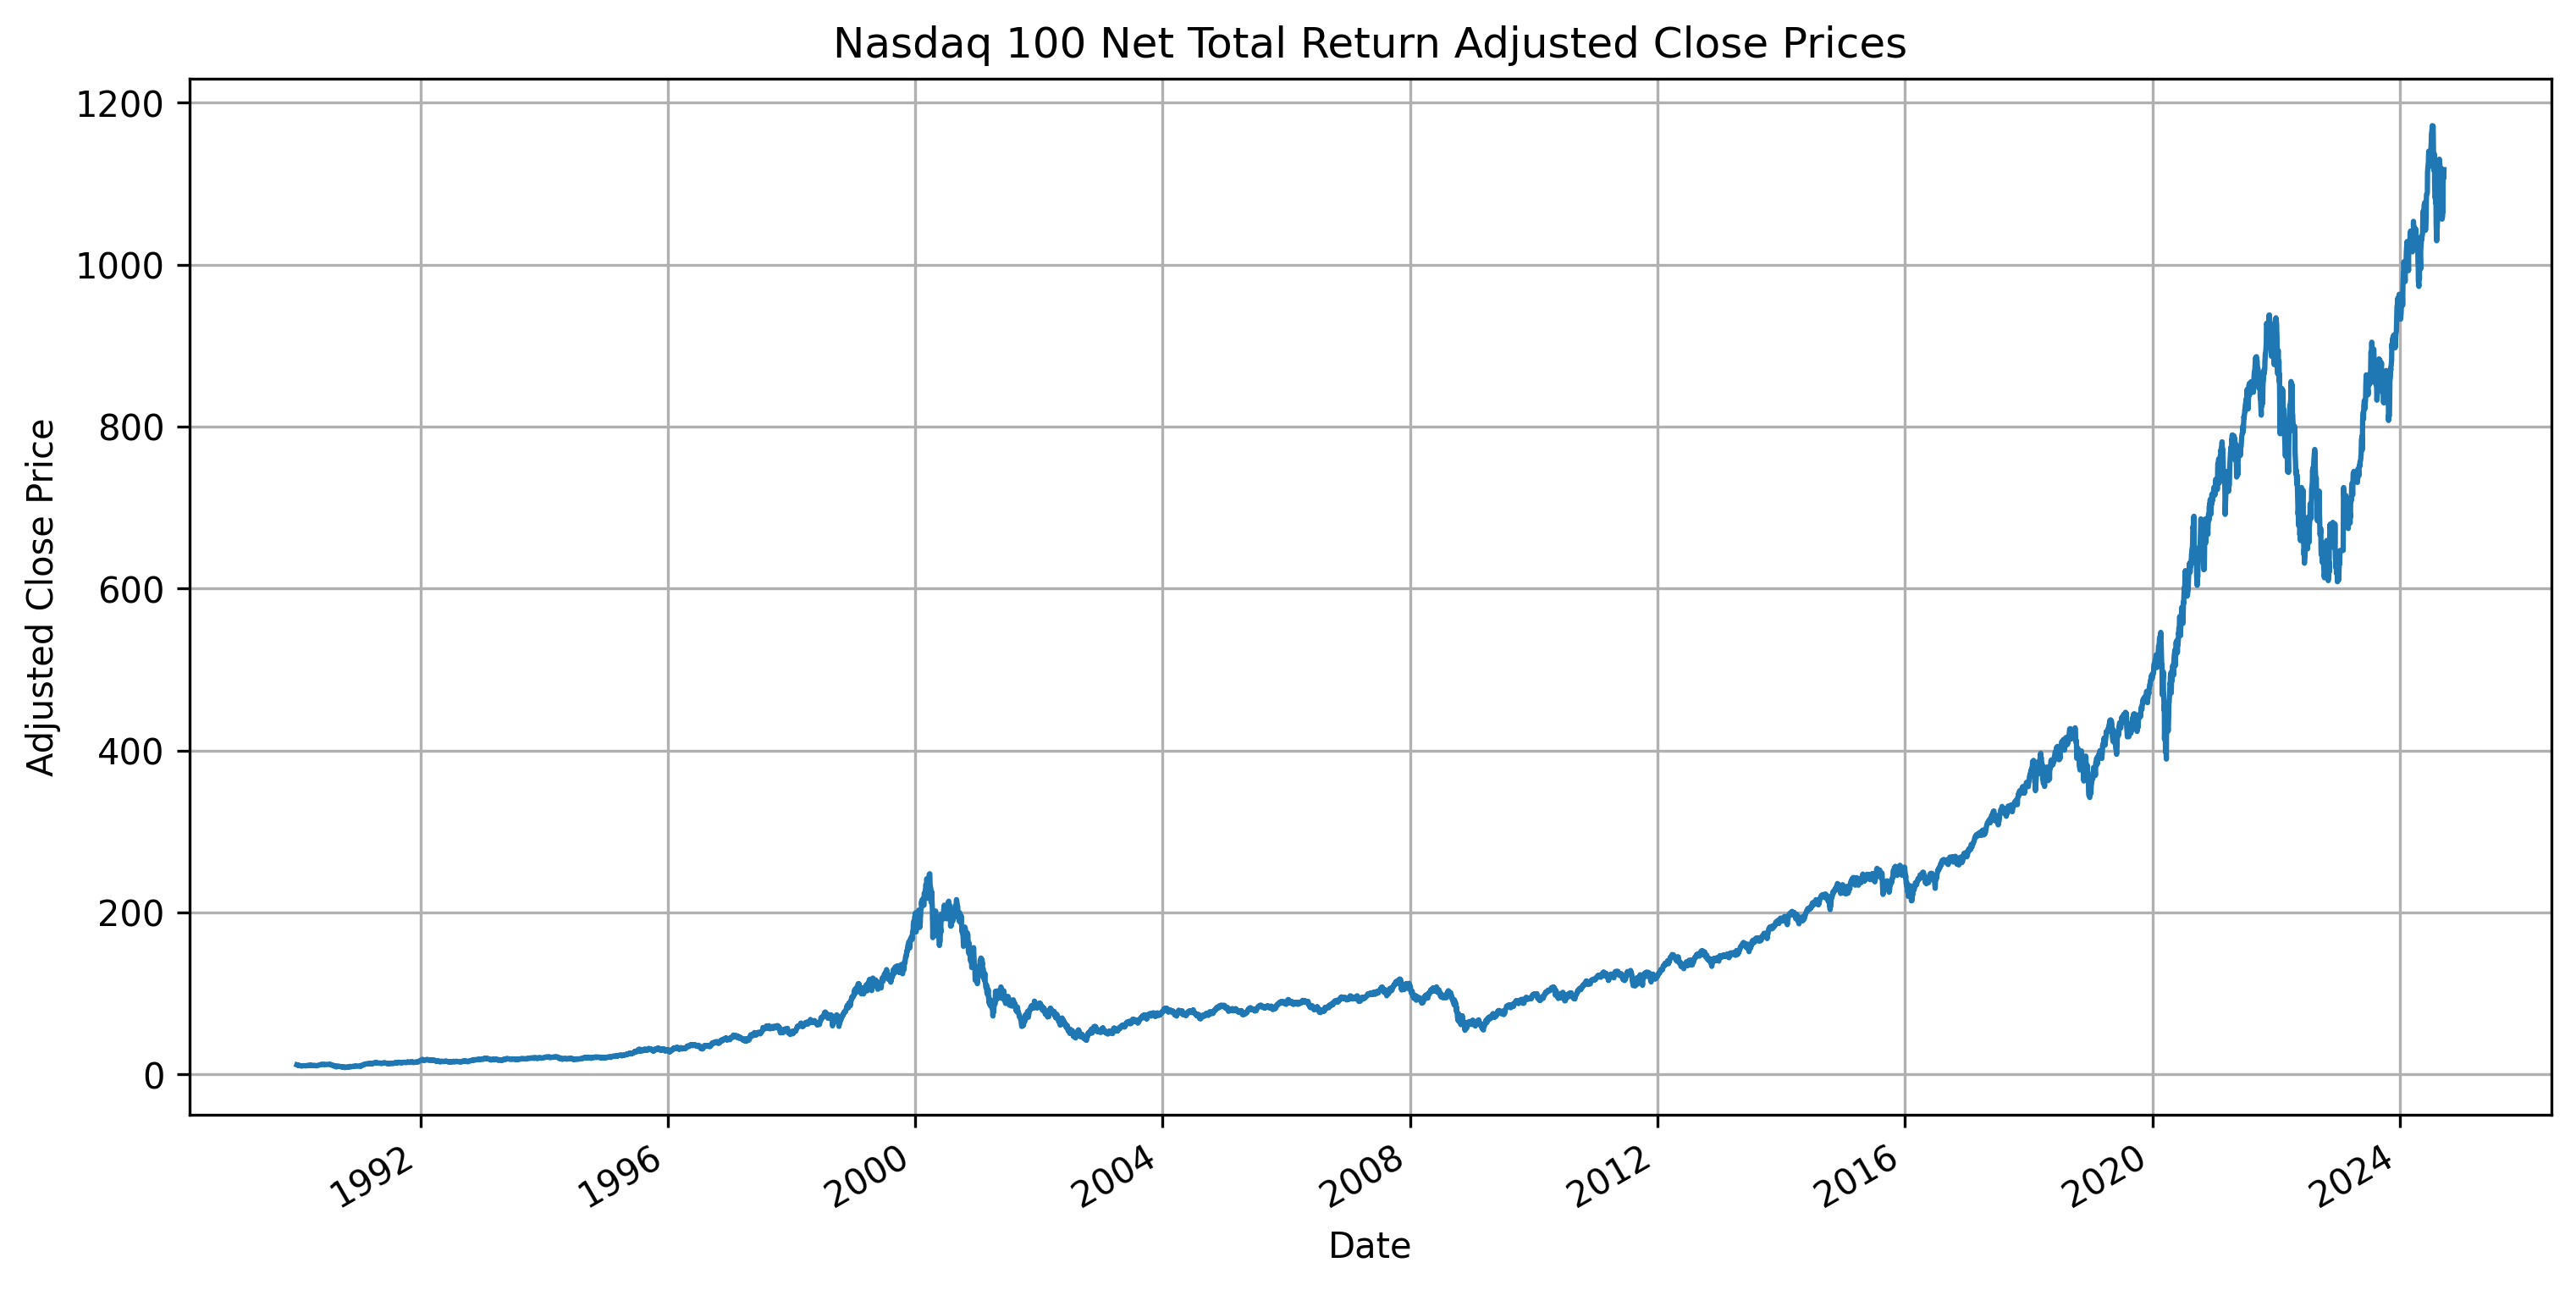

In [112]:
# Suppress SettingWithCopyWarning
pd.options.mode.chained_assignment = None

# Fetch data for ^NDX (NASDAQ-100 Index)
ndx_data = yf.download('^NDX', start='1990-01-01', end='2024-09-18')

# Fetch data for CSNDX.SW (ETF tracking NASDAQ-100 Net Total Return)
csndx_data = yf.download('CSNDX.SW', start='1990-01-01', end='2024-09-18')

# Check if data was fetched successfully
if ndx_data.empty or csndx_data.empty:
    print("Failed to fetch data for one or both tickers.")
else:
    # Get the first date where CSNDX.SW data is available
    first_csndx_date = csndx_data.first_valid_index()
    print(f"First available date for CSNDX.SW: {first_csndx_date.date()}")

    # Get NDX data up to the day before CSNDX.SW data starts
    ndx_data_trimmed = ndx_data.loc[ndx_data.index < first_csndx_date].copy()

    # Ensure there is overlapping data
    if ndx_data_trimmed.empty:
        print("No overlapping data found before CSNDX.SW starts.")
    else:
        # Get the last 'Adj Close' value of NDX before CSNDX.SW starts
        last_ndx_value = ndx_data_trimmed['Adj Close'].iloc[-1]

        # Get the first 'Adj Close' value of CSNDX.SW
        first_csndx_value = csndx_data['Adj Close'].iloc[0]

        # Calculate scaling factor to align the two datasets
        scaling_factor = first_csndx_value / last_ndx_value

        # Scale NDX 'Adj Close' to match CSNDX.SW
        ndx_data_trimmed['Adj Close'] = ndx_data_trimmed['Adj Close'] * scaling_factor

        # Extract 'Adj Close' columns
        ndx_adj_close = ndx_data_trimmed['Adj Close']
        csndx_adj_close = csndx_data['Adj Close']

        # Concatenate the two series
        nasdaq = pd.concat([ndx_adj_close, csndx_adj_close])

        # Plot the combined data
        plt.figure(figsize=(12, 6), dpi=300)
        nasdaq.plot(title='Nasdaq 100 Net Total Return Adjusted Close Prices')
        plt.xlabel('Date')
        plt.ylabel('Adjusted Close Price')
        plt.grid(True)
        plt.show()

        # Optional: Save the combined data to a CSV file
        nasdaq.to_csv('combined_ndx_csndx.csv', header=['Adjusted Close'])

In [113]:
em_data = pd.read_csv('data/msci_em_net_return.csv', index_col='Date', parse_dates=True)
print(em_data.head())

            Emerging Markets
Date                        
1999-01-29            98.493
1999-02-26            99.442
1999-03-31           112.582
1999-04-30           126.502
1999-05-31           125.771


[*********************100%***********************]  1 of 1 completed


First available date for XSX6.DE: 2009-01-20


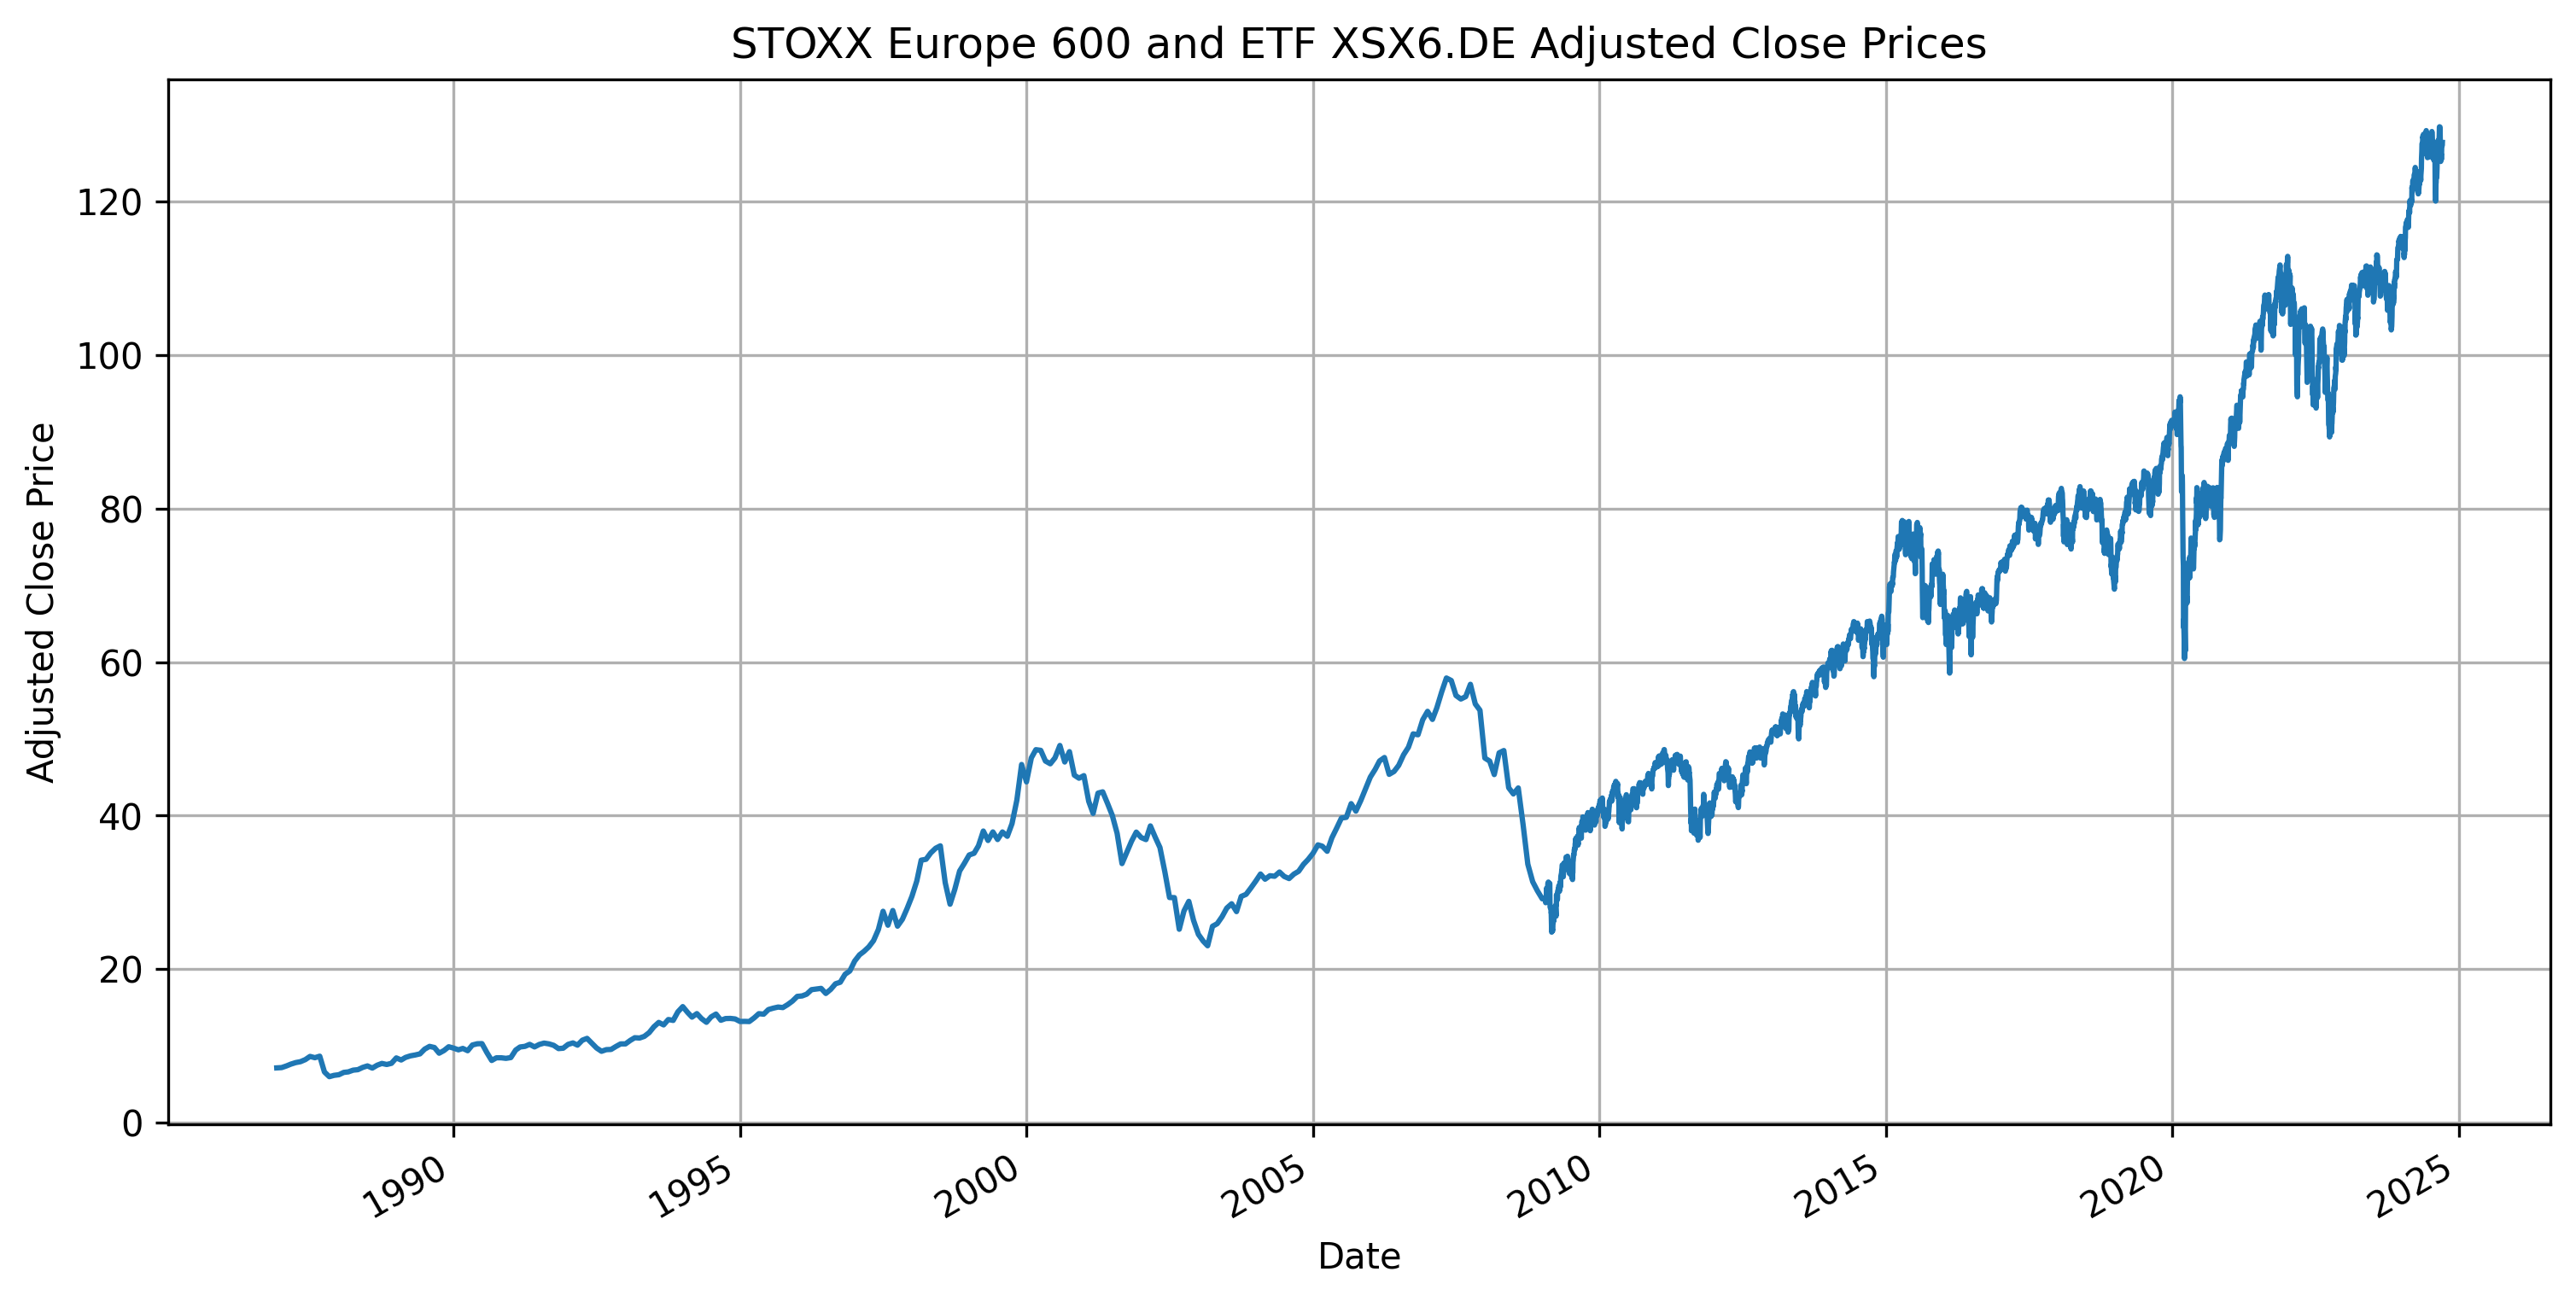

Data successfully concatenated and saved to 'combined_stoxx_etf.csv'


In [114]:
# Load your existing STOXX Europe 600 data
stoxx_data = pd.read_csv('data/stoxx600.csv')

# Fetch data for XSX6.DE (ETF tracking STOXX Europe 600)
etf_data = yf.download('XSX6.DE', start='1990-01-01', end='2024-09-18')

# Ensure that the 'Date' column in stoxx_data is a datetime object
stoxx_data['Date'] = pd.to_datetime(stoxx_data['Date'], format='%m/%Y')

# Check if data was fetched successfully
if etf_data.empty:
    print("Failed to fetch data for XSX6.DE.")
else:
    # Get the first date where XSX6.DE data is available
    first_etf_date = etf_data.first_valid_index()
    print(f"First available date for XSX6.DE: {first_etf_date.date()}")

    # Get STOXX data up to the day before XSX6.DE data starts
    stoxx_data_trimmed = stoxx_data[stoxx_data['Date'] < first_etf_date].copy()

    # Ensure there is overlapping data
    if stoxx_data_trimmed.empty:
        print("No overlapping data found before XSX6.DE starts.")
    else:
        # Get the last 'STOXX Europe 600' value of STOXX before XSX6.DE starts
        last_stoxx_value = stoxx_data_trimmed['STOXX Europe 600'].iloc[-1]

        # Get the first 'Adj Close' value of XSX6.DE
        first_etf_value = etf_data['Adj Close'].iloc[0]

        # Calculate scaling factor to align the two datasets
        scaling_factor = first_etf_value / last_stoxx_value

        # Scale STOXX Europe 600 data to match XSX6.DE
        stoxx_data_trimmed['STOXX Europe 600'] = stoxx_data_trimmed['STOXX Europe 600'] * scaling_factor

        # Extract 'STOXX Europe 600' and 'Adj Close' columns
        stoxx_adj_close = stoxx_data_trimmed.set_index('Date')['STOXX Europe 600']
        etf_adj_close = etf_data['Adj Close']

        # Concatenate the two series
        stoxx600 = pd.concat([stoxx_adj_close, etf_adj_close])

        # Plot the combined data
        plt.figure(figsize=(12, 6), dpi=300)
        stoxx600.plot(title='STOXX Europe 600 and ETF XSX6.DE Adjusted Close Prices')
        plt.xlabel('Date')
        plt.ylabel('Adjusted Close Price')
        plt.grid(True)
        plt.show()

        # Optional: Save the combined data to a CSV file
        stoxx600.to_csv('combined_stoxx_etf.csv', header=['Adjusted Close'])

        print("Data successfully concatenated and saved to 'combined_stoxx_etf.csv'")

In [115]:
# Spot Price SPDR Gold Trust ETF (GLD)
gold_spot = yf.download('GC=F', start='1990-01-01', end='2024-09-18')

[*********************100%***********************]  1 of 1 completed


In [116]:
msci_world_data = pd.read_csv('data/msci_world_net_return.csv', index_col='Date', parse_dates=True)

# Step 1: Resample the data to monthly frequency
msci_world_monthly = msci_world_data['Value'].resample('M').last()

# Step 2: Compute the monthly percentage returns
msci_world_returns = msci_world_monthly.pct_change().dropna()

# Step 3: Compute the cumulative returns
msci_world_cumulative_returns = (1 + msci_world_returns).cumprod()

# Optional: Print the first few rows of the cumulative returns
print(msci_world_cumulative_returns.head())

Date
2000-10-31    0.982760
2000-11-30    0.922891
2000-12-31    0.937418
2001-01-31    0.955470
2001-02-28    0.874620
Freq: ME, Name: Value, dtype: float64


Columns in returns_df: ['SP500', 'Nasdaq', 'Emerging Markets', 'Stoxx600', 'Gold']


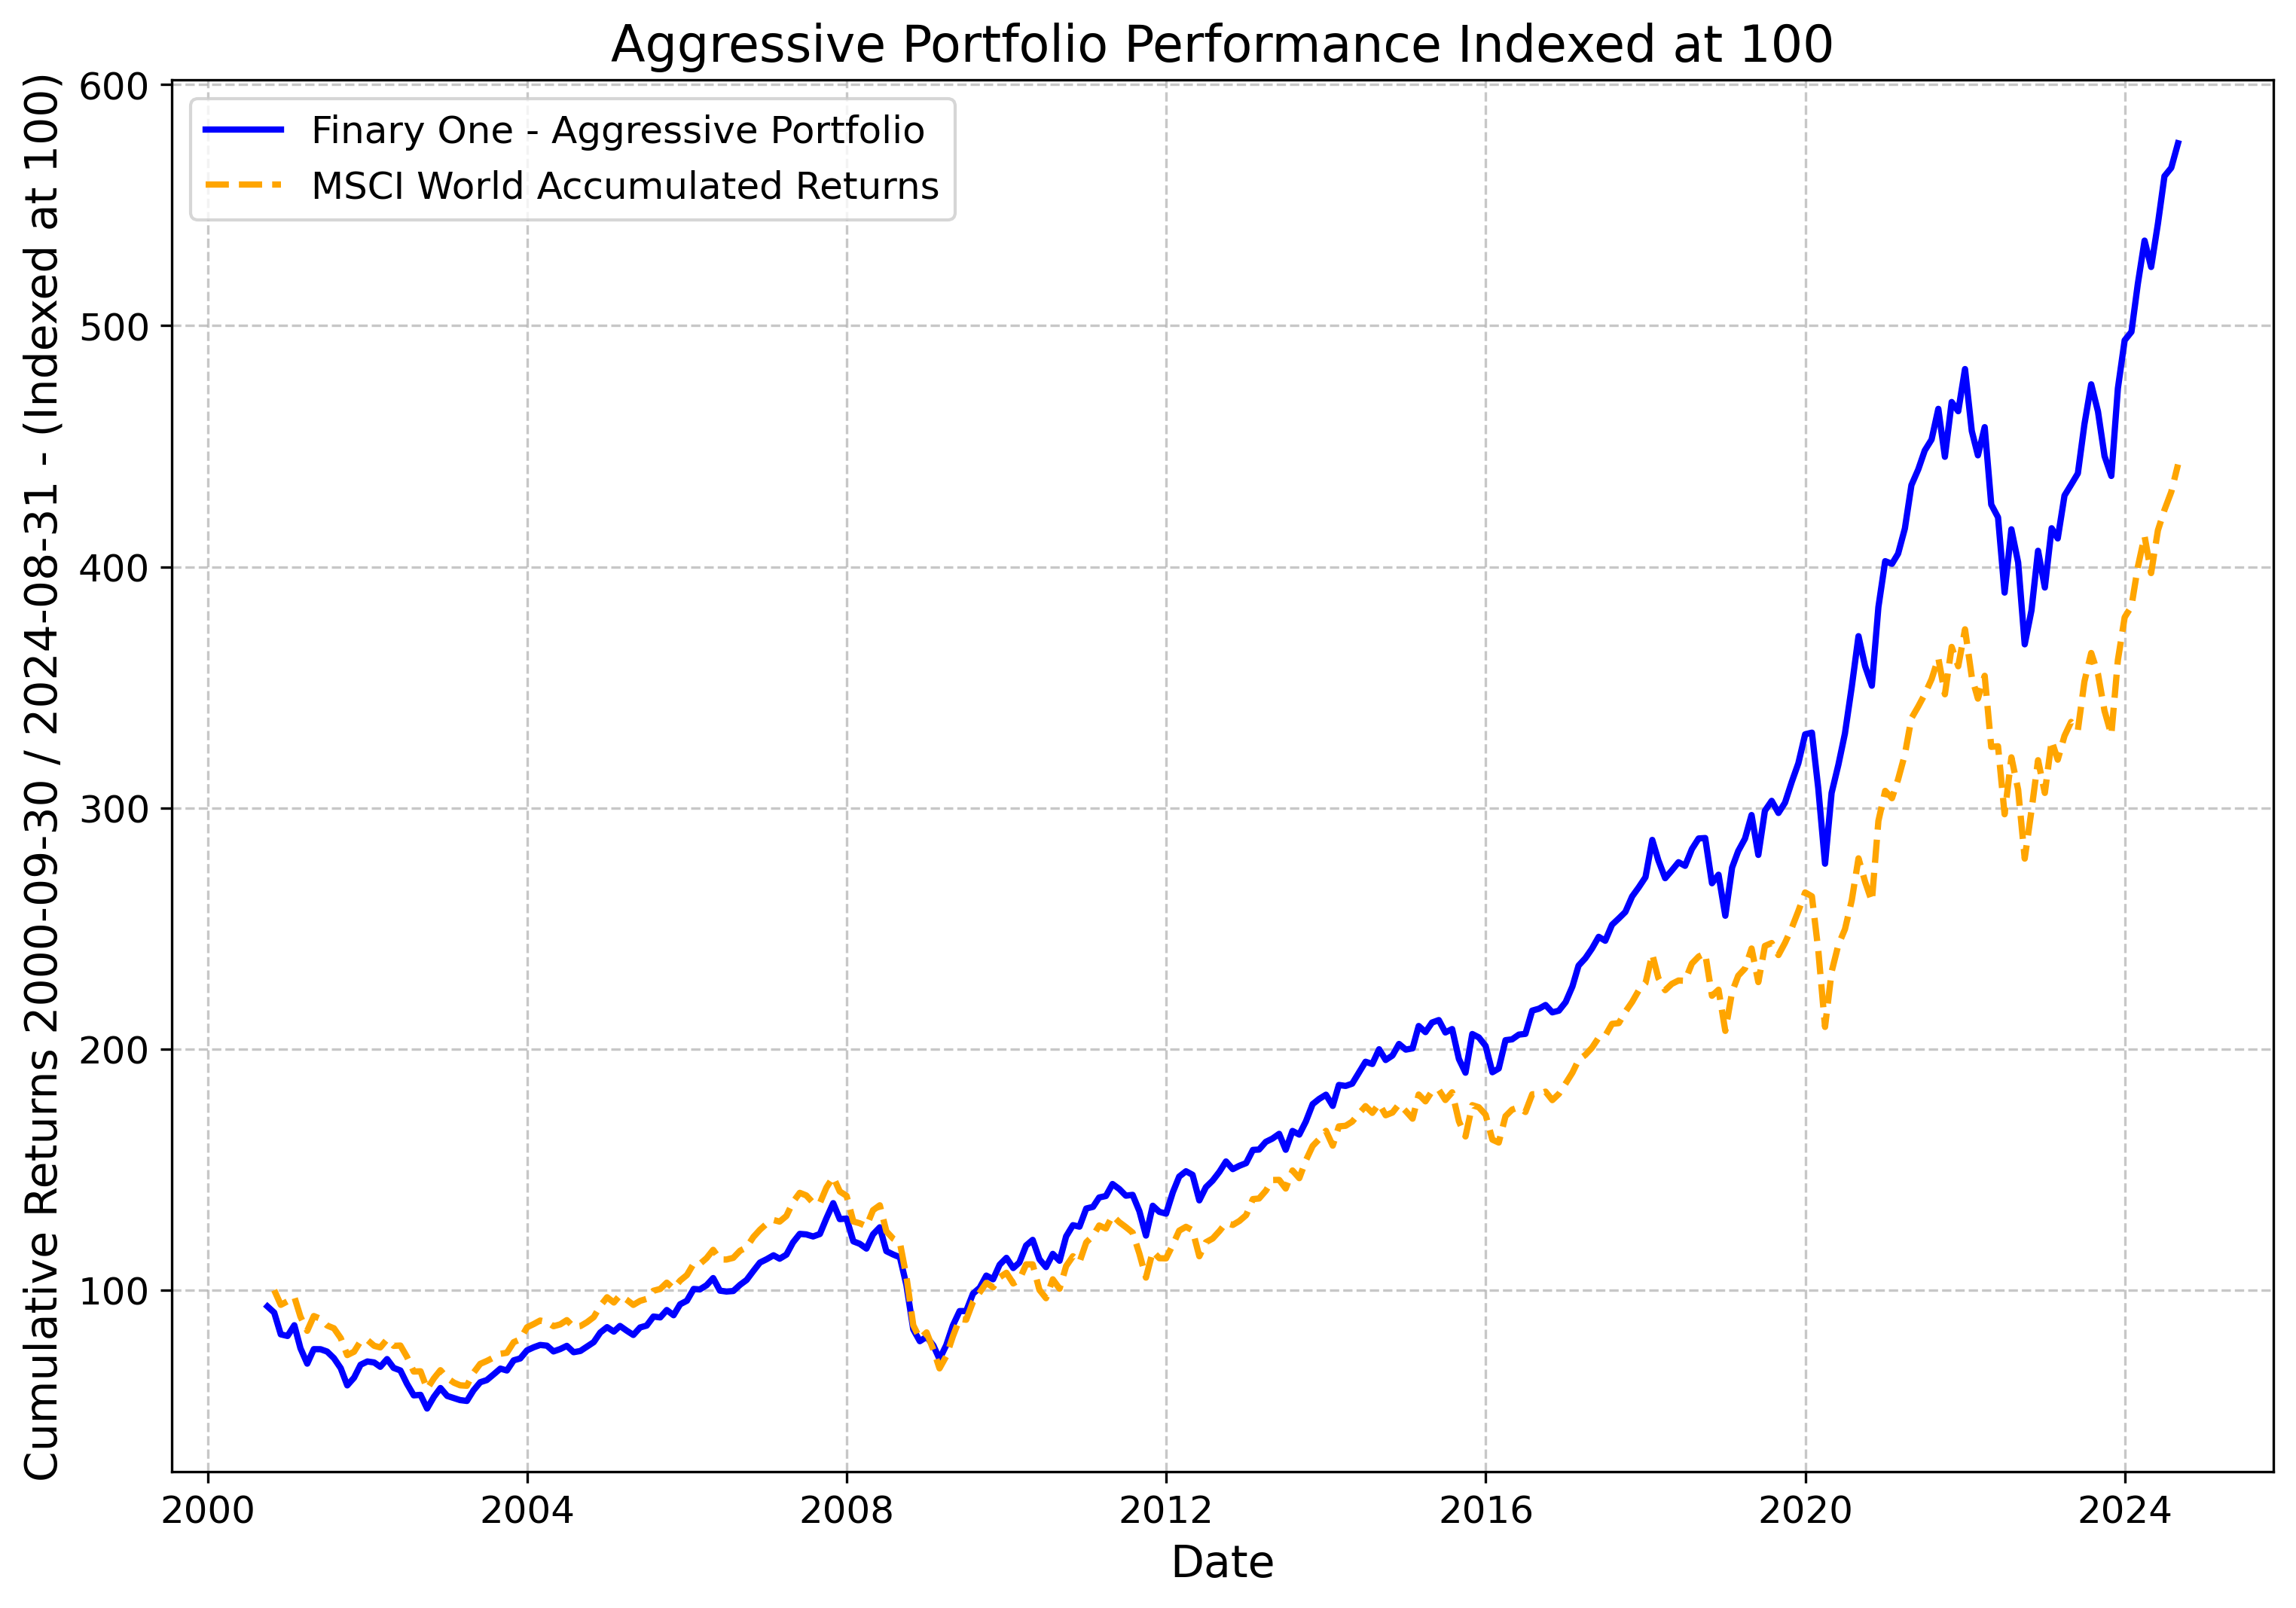

In [117]:
# Step 1: Extract the 'Adj Close' (or appropriate) column and resample to monthly data
sp_monthly = sp_data['Adj Close'].resample('M').last()
nasdaq_monthly = nasdaq.resample('M').last()
em_monthly = em_data.resample('M').last()
stoxx600_monthly = stoxx600.resample('M').last()
gold_monthly = gold_spot['Adj Close'].resample('M').last()

# Step 2: Compute monthly percentage returns and assign a name to each Series
sp_returns = sp_monthly.pct_change().dropna()
sp_returns.name = 'SP500'

nasdaq_returns = nasdaq_monthly.pct_change().dropna()
nasdaq_returns.name = 'Nasdaq'

em_returns = em_monthly.pct_change().dropna()
em_returns.name = 'MSCI_EM'

stoxx600_returns = stoxx600_monthly.pct_change().dropna()
stoxx600_returns.name = 'Stoxx600'

gold_returns = gold_monthly.pct_change().dropna()
gold_returns.name = 'Gold'

# Step 3: Combine the returns into a DataFrame
returns_df = pd.concat(
    [sp_returns, nasdaq_returns, em_returns, stoxx600_returns, gold_returns],
    axis=1
)

# Step 4: Drop rows with NaN values to align the dates
returns_df.dropna(inplace=True)

# Optional: Verify that the DataFrame now has 5 columns
print(f"Columns in returns_df: {returns_df.columns.tolist()}")  # Should list all 5 asset names

# Step 5: Define your portfolio weights
weights = [0.4, 0.2, 0.15, 0.15, 0.1]

# Ensure weights sum to 1 (optional if weights are already normalized)
weights = [w / sum(weights) for w in weights]

# Step 6: Compute the portfolio returns
portfolio_returns = returns_df.dot(weights)

# Step 7: Index cumulative returns to 100 instead of 1
cumulative_returns_indexed = 100 * (1 + portfolio_returns).cumprod()
msci_world_cumulative_returns_indexed = 100 * msci_world_cumulative_returns / msci_world_cumulative_returns.iloc[0]

# Step 8: Save everything in a variable called aggressive_portfolio
cumulative_returns_indexed.index = pd.to_datetime(cumulative_returns_indexed.index)

aggressive_portfolio = pd.DataFrame({
    'Portfolio_Returns': portfolio_returns,
    'Cumulative_Returns': cumulative_returns_indexed
})

# Step 9: Plot the performance, indexed at 100
plt.figure(figsize=(12, 8), dpi=300)
plt.plot(cumulative_returns_indexed, label='Finary One - Aggressive Portfolio', color='blue', linewidth=2)
plt.plot(msci_world_cumulative_returns_indexed, label='MSCI World Accumulated Returns', color='orange', linestyle='--', linewidth=2)
plt.title('Aggressive Portfolio Performance Indexed at 100', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Returns 2000-09-30 / 2024-08-31 - (Indexed at 100)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [118]:
global_stats = ffn.calc_stats(cumulative_returns)
global_stats.set_riskfree_rate(0.01)
global_stats.display()

Stats for None from 2000-09-30 00:00:00 - 2024-08-31 00:00:00
Annual risk-free rate considered: 1.00%
Summary:
Total Return    Sharpe    CAGR    Max Drawdown
--------------  --------  ------  --------------
517.24%         -         7.91%   -47.53%

Annualized Returns:
mtd    3m     6m      ytd     1y      3y     5y      10y     incep.
-----  -----  ------  ------  ------  -----  ------  ------  --------
1.80%  6.16%  11.30%  16.54%  23.96%  7.33%  14.08%  11.15%  7.91%

Periodic:
        daily    monthly    yearly
------  -------  ---------  --------
sharpe  -        0.52       0.50
mean    -        8.75%      10.23%
vol     -        14.86%     18.55%
skew    -        -0.62      -0.92
kurt    -        1.13       0.72
best    -        10.60%     40.62%
worst   -        -17.86%    -37.82%

Drawdowns:
max      avg       # days
-------  ------  --------
-47.53%  -7.35%    198.29

Misc:
---------------  ------
avg. up month    3.25%
avg. down month  -3.58%
up year %        75.00%
12m up % 

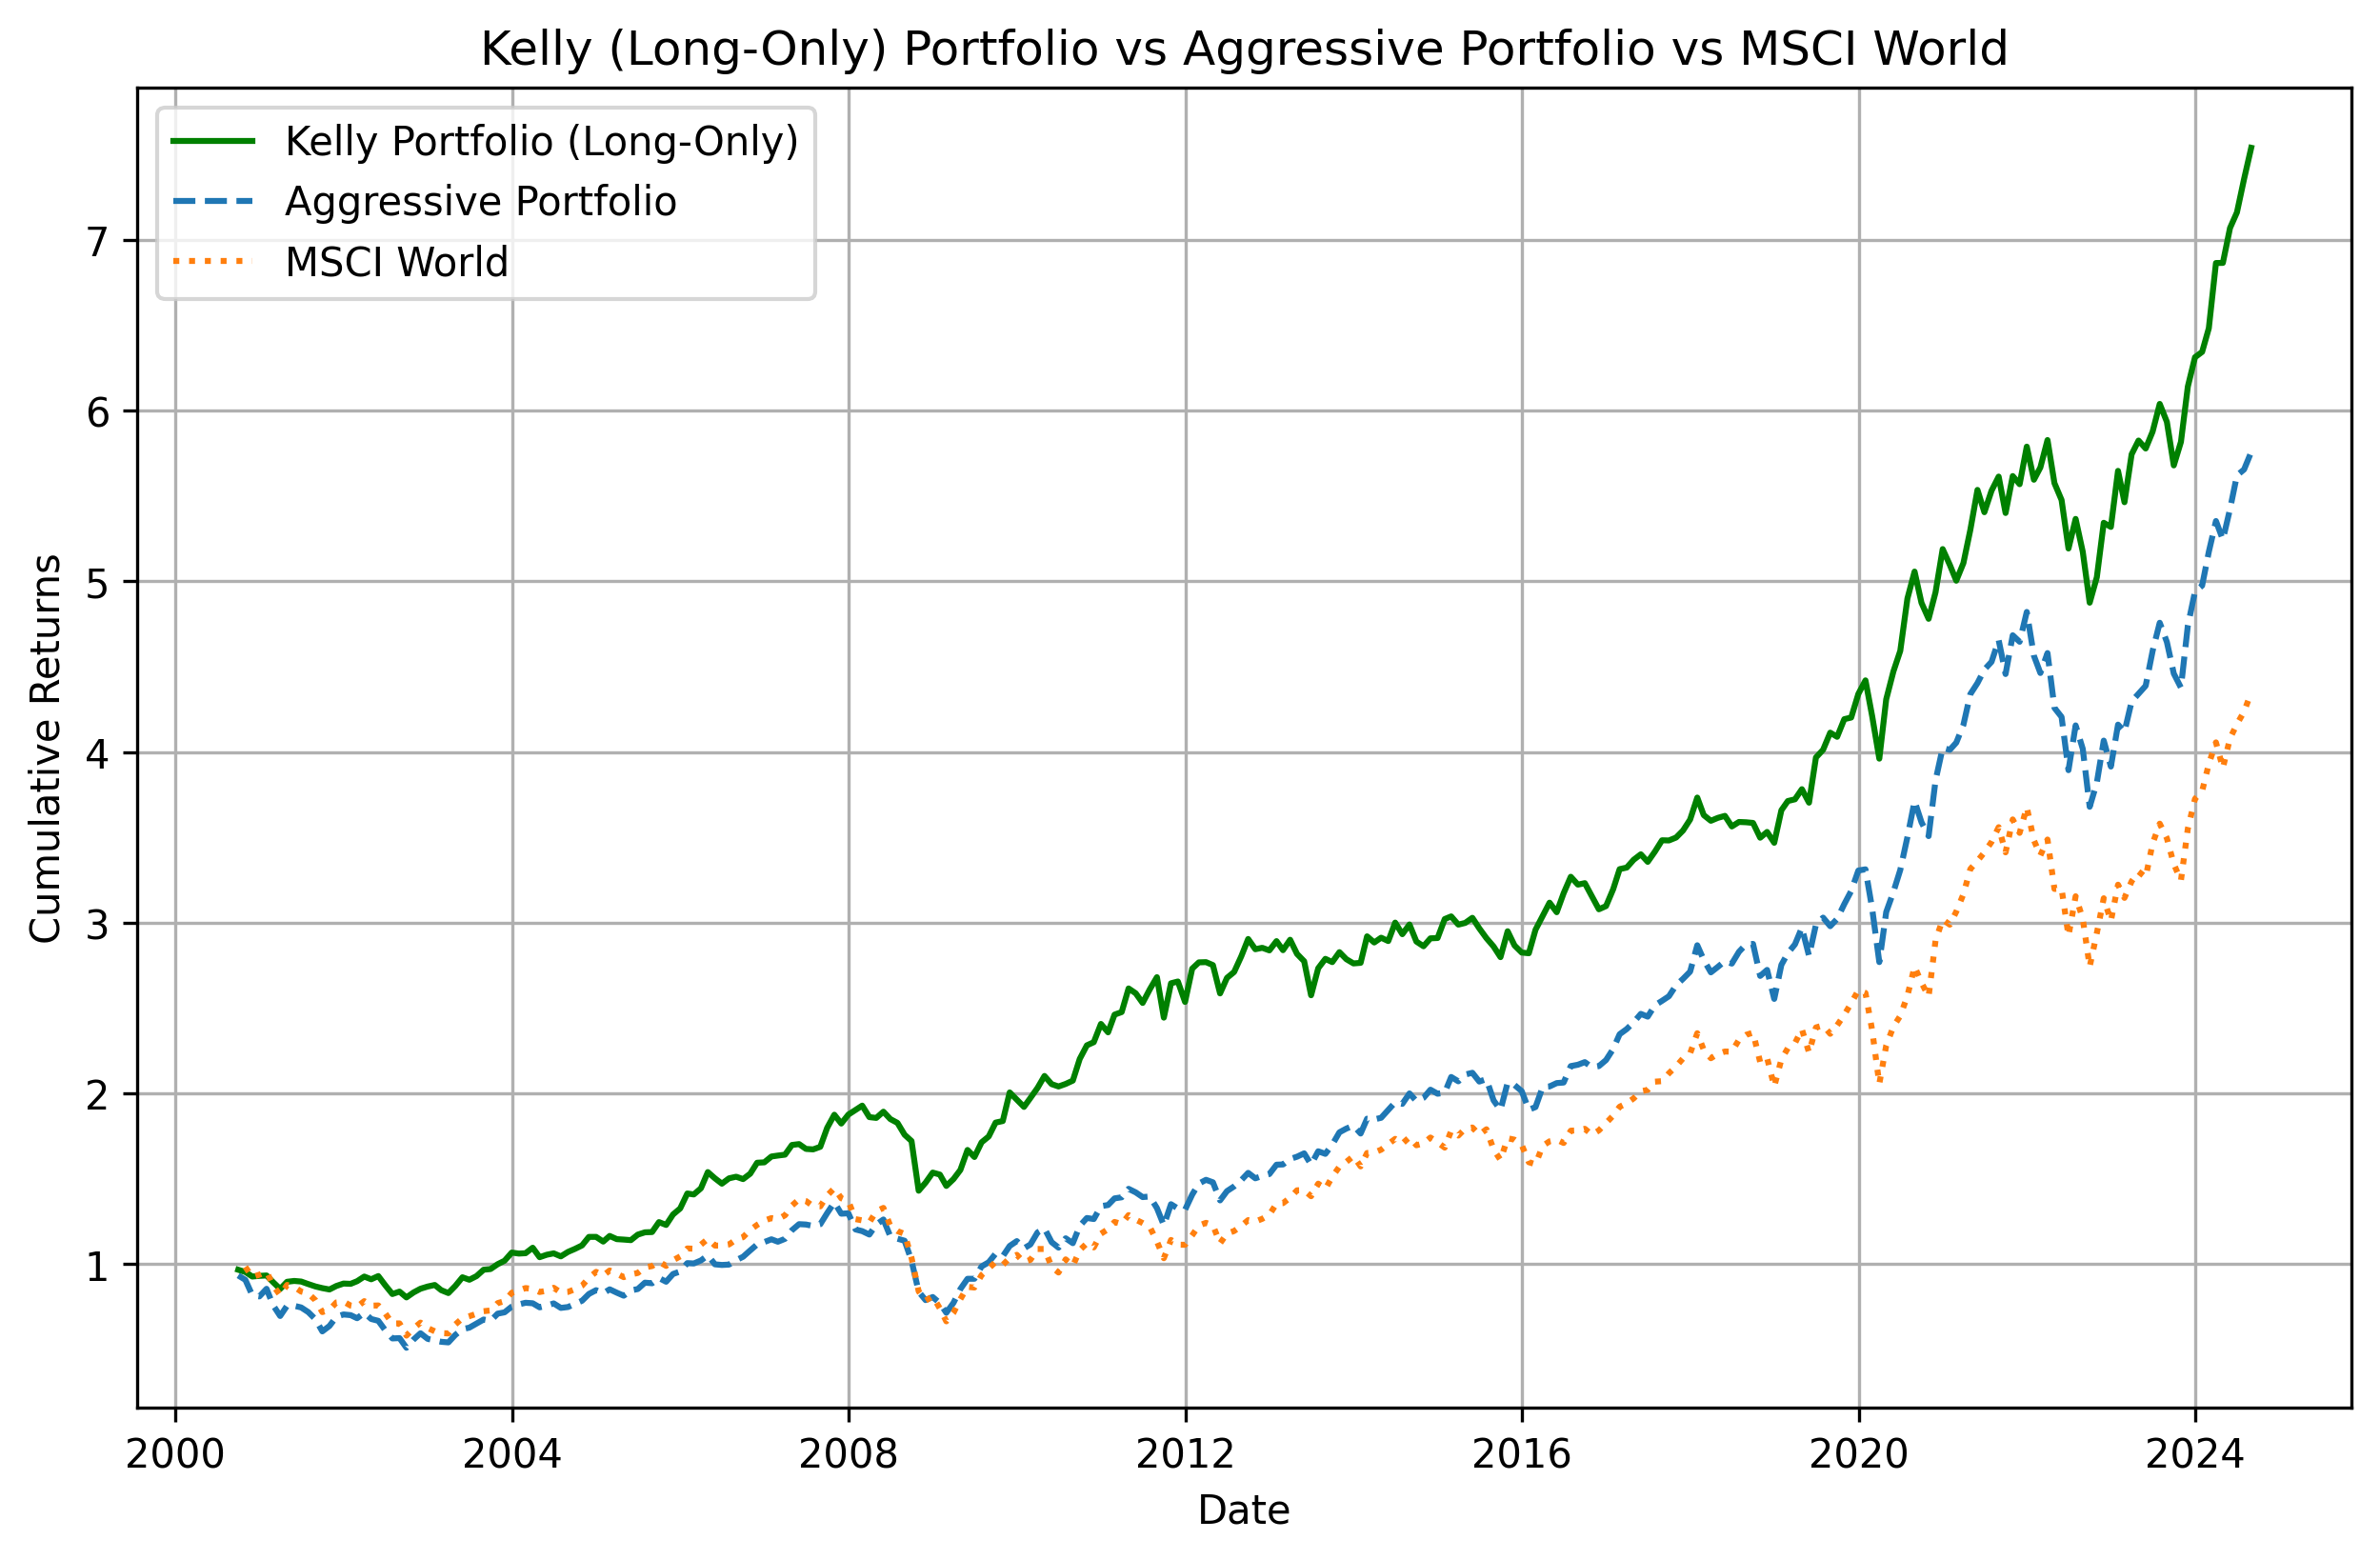

,Asset,Kelly Weights (Long-Only)
0,SP500,3.729802e-01
1,Nasdaq,7.308813e-17
2,Emerging Markets,1.394403e-14
3,Stoxx600,1.313814e-01
4,Gold,4.956384e-01


In [119]:
from scipy.optimize import minimize

# Step 1: Define the objective function (negative Kelly's criterion to minimize)
def kelly_criterion(weights, expected_returns, cov_matrix):
    # Negative of Kelly formula (since we are minimizing)
    portfolio_return = np.dot(weights, expected_returns)
    portfolio_variance = np.dot(weights.T, np.dot(cov_matrix, weights))
    return -portfolio_return / portfolio_variance

# Step 2: Define constraints and bounds (no shorting or leverage)
num_assets = len(expected_returns)
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})  # Weights sum to 1
bounds = tuple((0, 1) for _ in range(num_assets))  # No shorting, weights between 0 and 1

# Step 3: Initial guess for weights (equal weight allocation)
initial_weights = num_assets * [1. / num_assets]

# Step 4: Optimize using scipy's minimize function
result = minimize(kelly_criterion, initial_weights, args=(expected_returns, cov_matrix),
                  method='SLSQP', bounds=bounds, constraints=constraints)

# Step 5: Get the optimized Kelly weights
kelly_weights_long_only = result.x

# Step 6: Compute the Kelly portfolio returns using the optimized weights
kelly_portfolio_returns_long_only = returns_df.dot(kelly_weights_long_only)

# Step 7: Compute cumulative returns for the long-only Kelly portfolio
kelly_cumulative_returns_long_only = (1 + kelly_portfolio_returns_long_only).cumprod()

# Step 8: Plot the performance of the long-only Kelly portfolio and compare it with the aggressive portfolio and MSCI World
plt.figure(figsize=(10, 6), dpi=300)

# Plot long-only Kelly portfolio cumulative returns
plt.plot(kelly_cumulative_returns_long_only, label='Kelly Portfolio (Long-Only)', color='green')

# Plot aggressive portfolio cumulative returns
plt.plot(cumulative_returns, label='Aggressive Portfolio', linestyle='--')

# Plot MSCI World cumulative returns
plt.plot(msci_world_cumulative_returns, label='MSCI World', linestyle=':')

plt.title('Kelly (Long-Only) Portfolio vs Aggressive Portfolio vs MSCI World')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()

# Display the optimized Kelly weights for each asset
kelly_weights_long_only_df = pd.DataFrame({
    'Asset': returns_df.columns,
    'Kelly Weights (Long-Only)': kelly_weights_long_only
})
kelly_weights_long_only_df

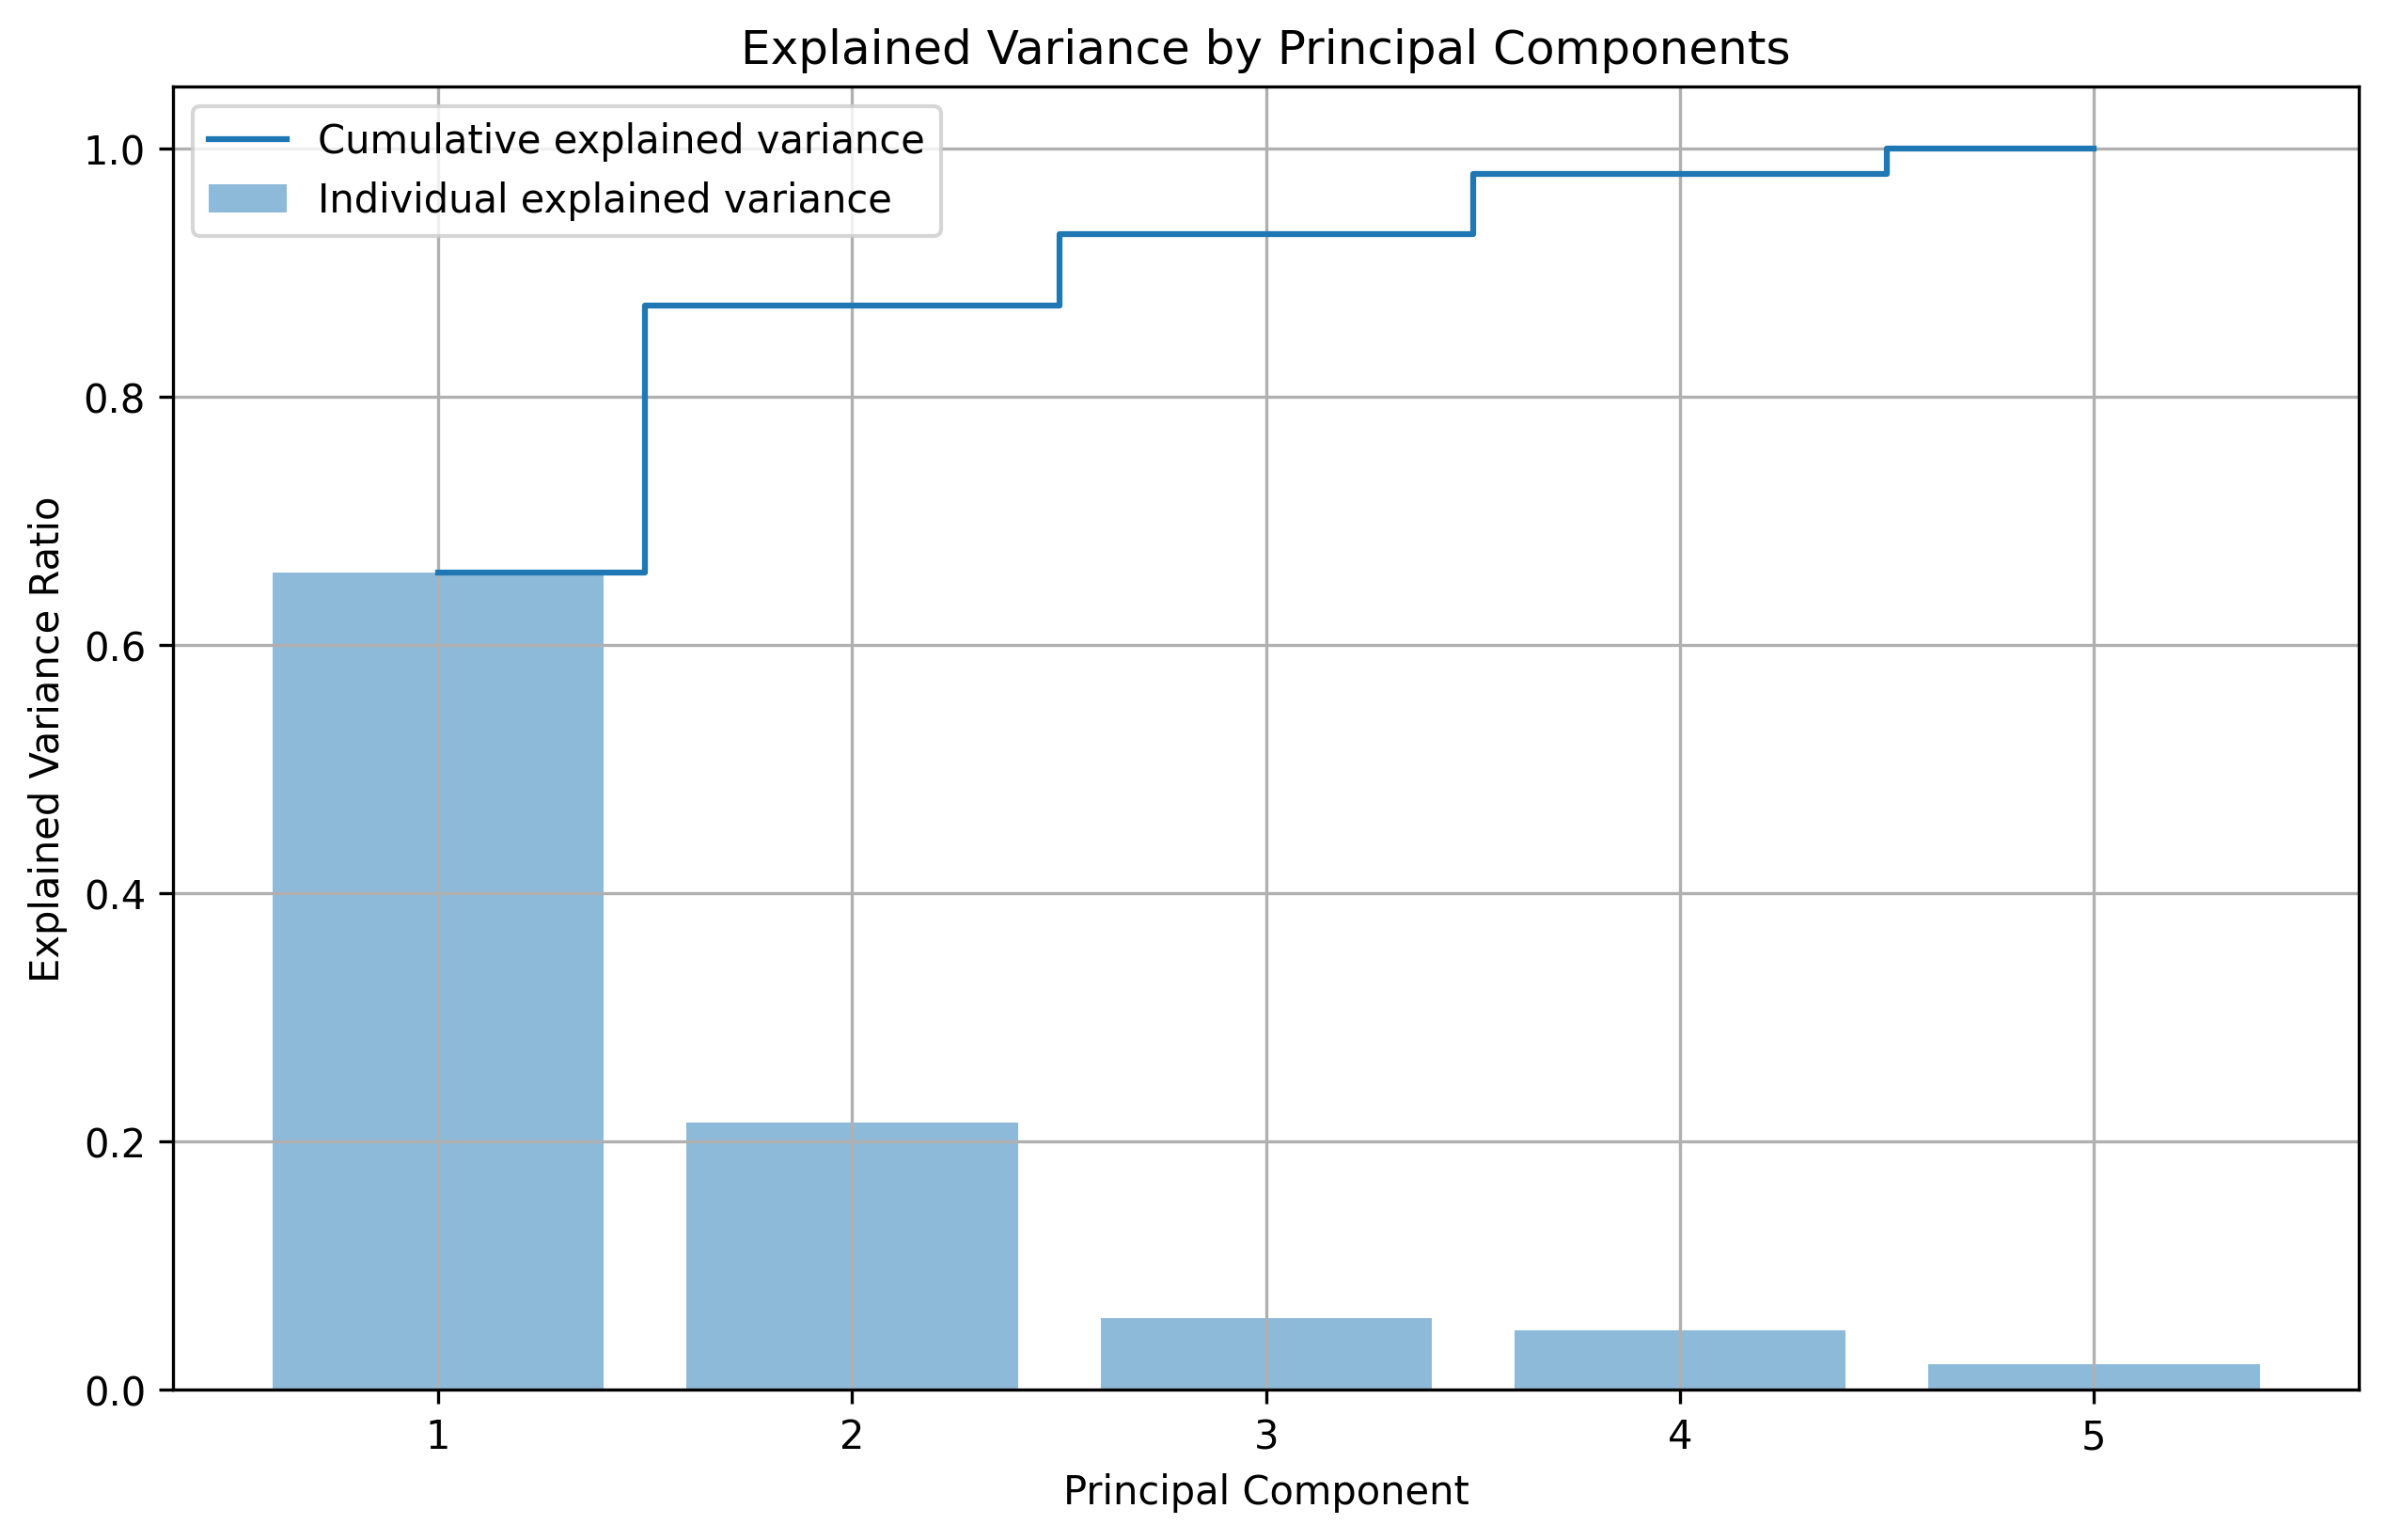

,SP500,Nasdaq,Emerging Markets,Stoxx600,Gold
PC1,0.525942,0.494433,0.476758,0.496776,0.069543
PC2,-0.067091,-0.122664,0.246249,-0.175209,0.942929
PC3,0.168594,0.697922,-0.571335,-0.350958,0.186781
PC4,0.195947,-0.298142,-0.620672,0.648856,0.257814
PC5,0.807505,-0.405593,-0.020166,-0.422291,-0.068509


In [120]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Standardize the data (mean=0, variance=1)
scaler = StandardScaler()
returns_scaled = scaler.fit_transform(returns_df)

# Step 2: Perform PCA
pca = PCA()
pca.fit(returns_scaled)

# Step 3: Get the explained variance ratio for each principal component
explained_variance = pca.explained_variance_ratio_

# Step 4: Plot the explained variance
plt.figure(figsize=(10, 6), dpi=300)
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(explained_variance) + 1), explained_variance.cumsum(), where='mid', label='Cumulative explained variance')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Step 5: Display the PCA components (principal axes in feature space)
pca_components = pd.DataFrame(pca.components_, columns=returns_df.columns, index=[f'PC{i+1}' for i in range(len(returns_df.columns))])
pca_components

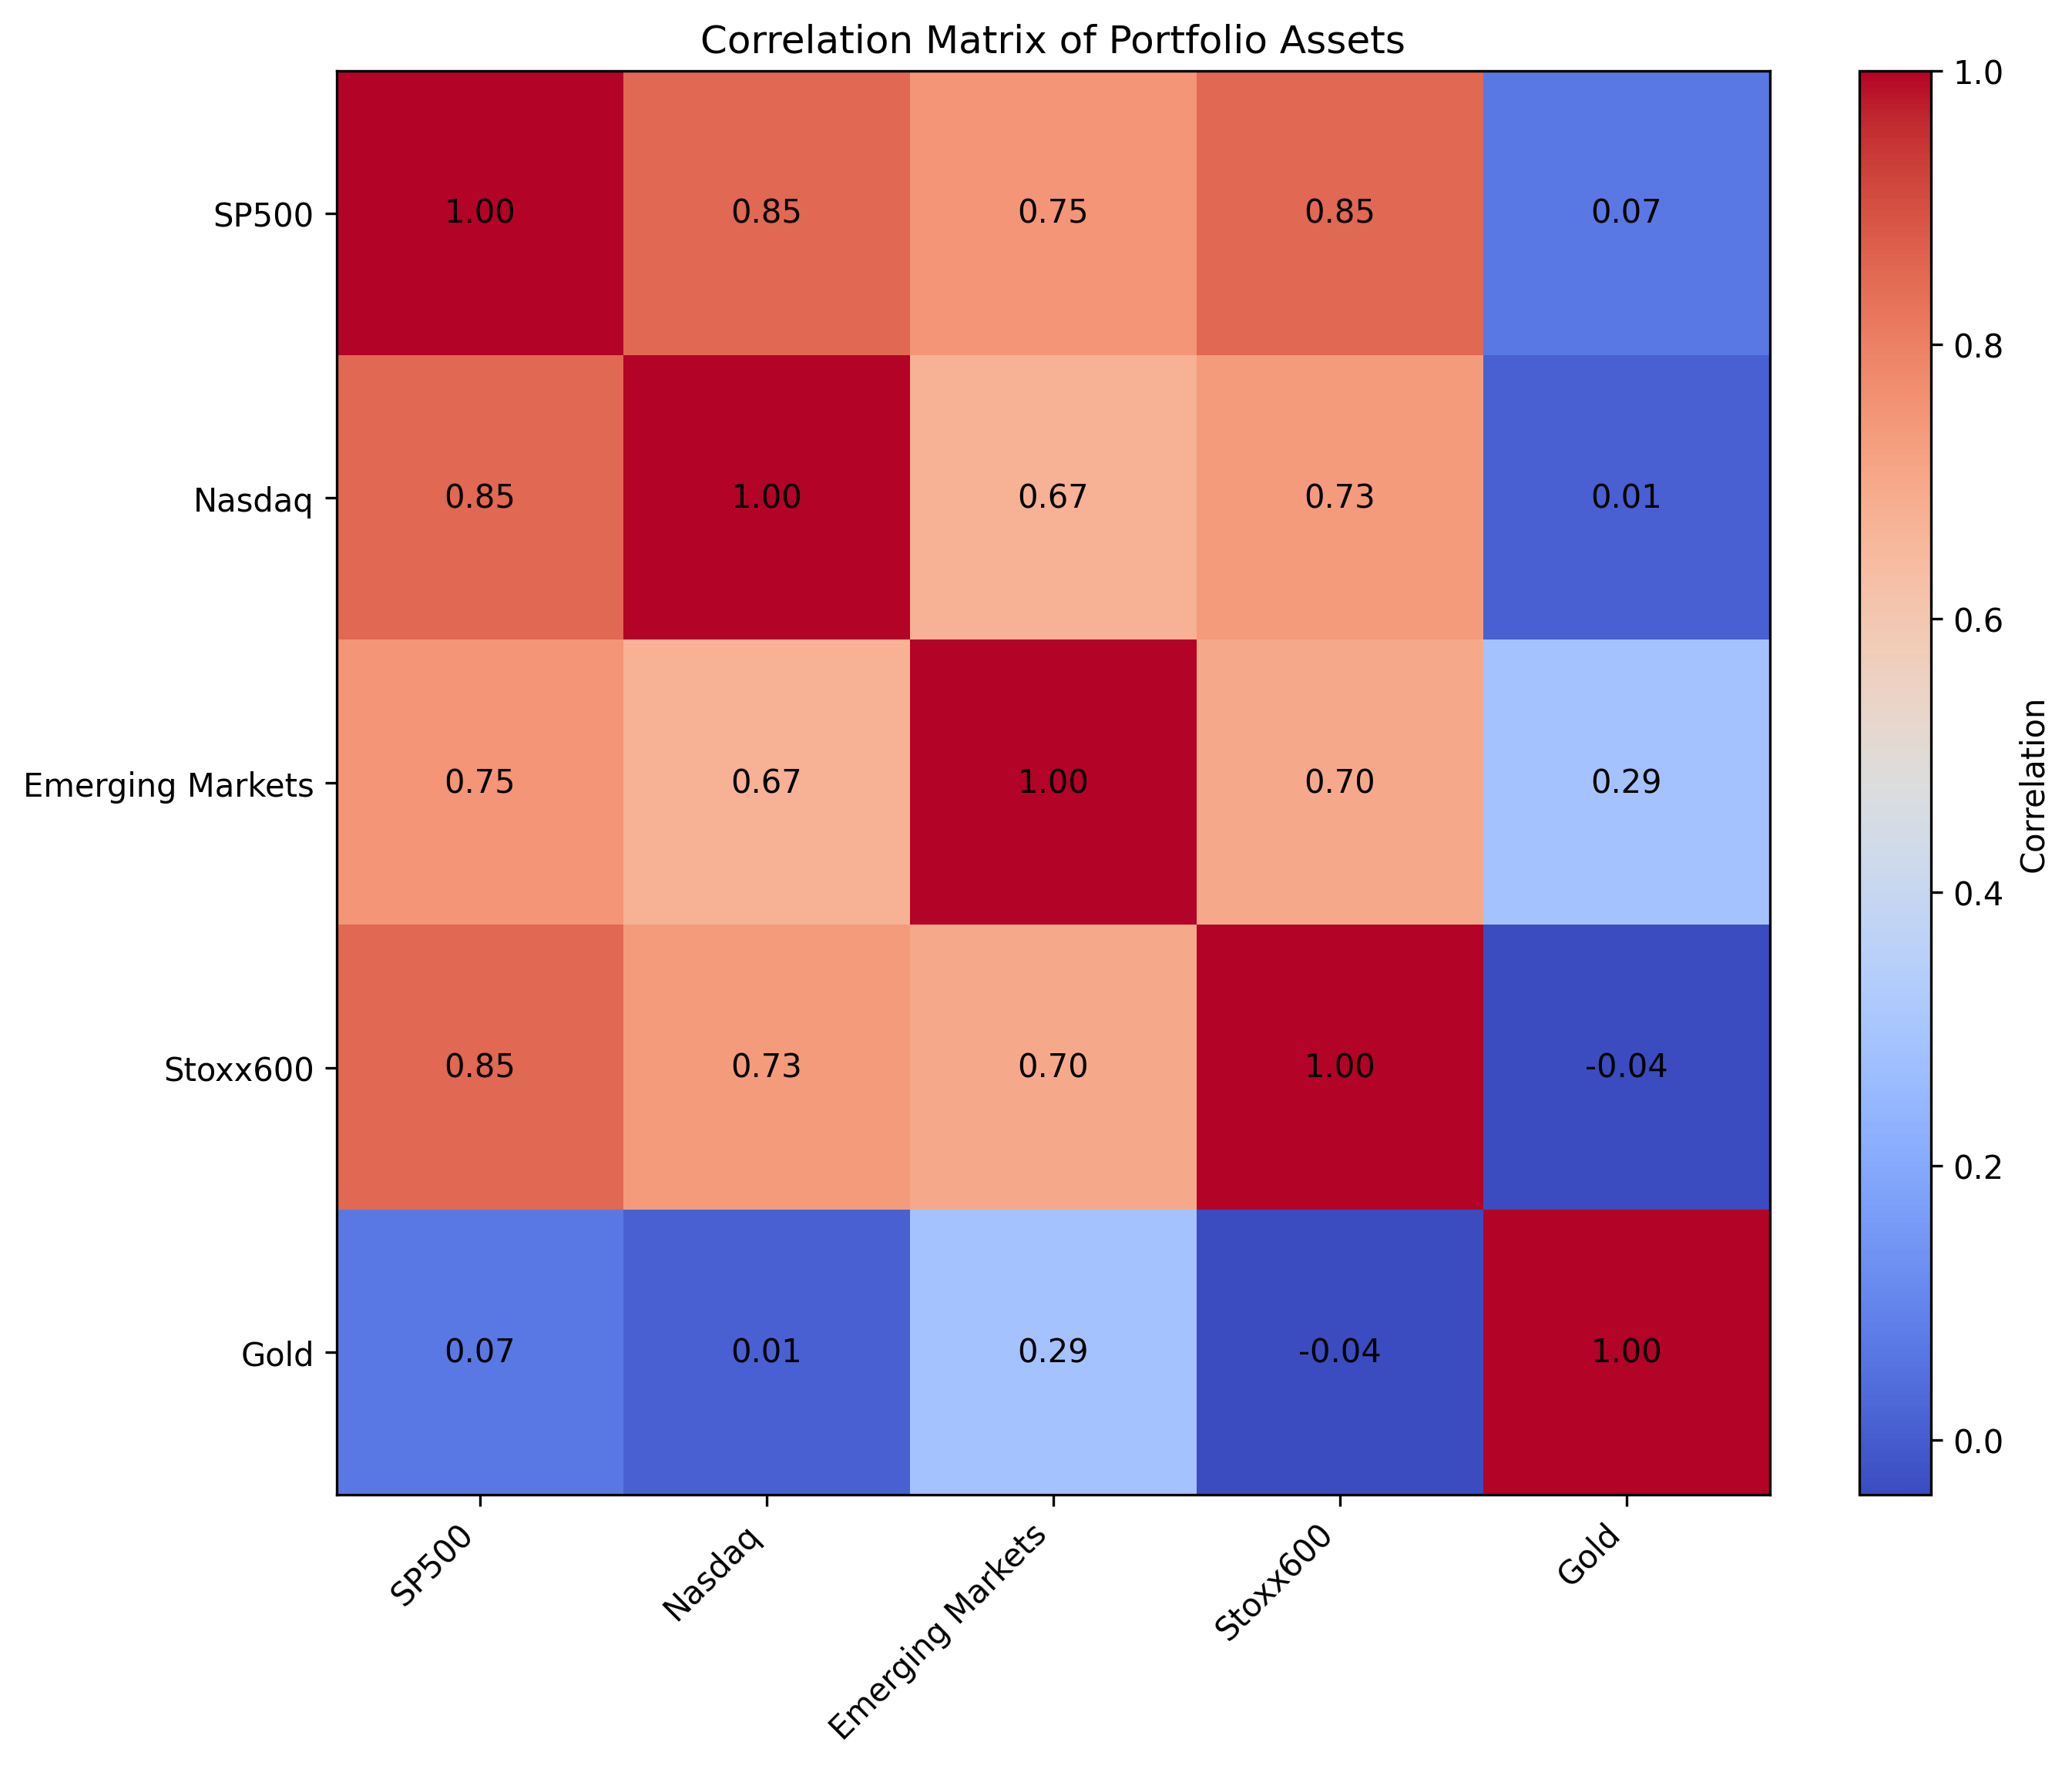

,SP500,Nasdaq,Emerging Markets,Stoxx600,Gold
SP500,1.000000,0.851044,0.748890,0.850685,0.067723
Nasdaq,0.851044,1.000000,0.673018,0.732154,0.010814
Emerging Markets,0.748890,0.673018,1.000000,0.695715,0.290231
Stoxx600,0.850685,0.732154,0.695715,1.000000,-0.040232
Gold,0.067723,0.010814,0.290231,-0.040232,1.000000


In [128]:
# Step 1: Compute the correlation matrix of the portfolio assets
correlation_matrix = returns_df.corr()

# Step 2: Plot the correlation matrix as a heatmap with numbers
plt.figure(figsize=(10, 8), dpi=300)
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', aspect='auto')
plt.colorbar(label='Correlation')

# Add the correlation numbers on the heatmap
for (i, j), val in np.ndenumerate(correlation_matrix):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

# Set x and y axis labels
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45, ha='right')
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix of Portfolio Assets')
plt.grid(False)
plt.show()

# Step 3: Optionally, display the correlation matrix as a DataFrame
correlation_matrix


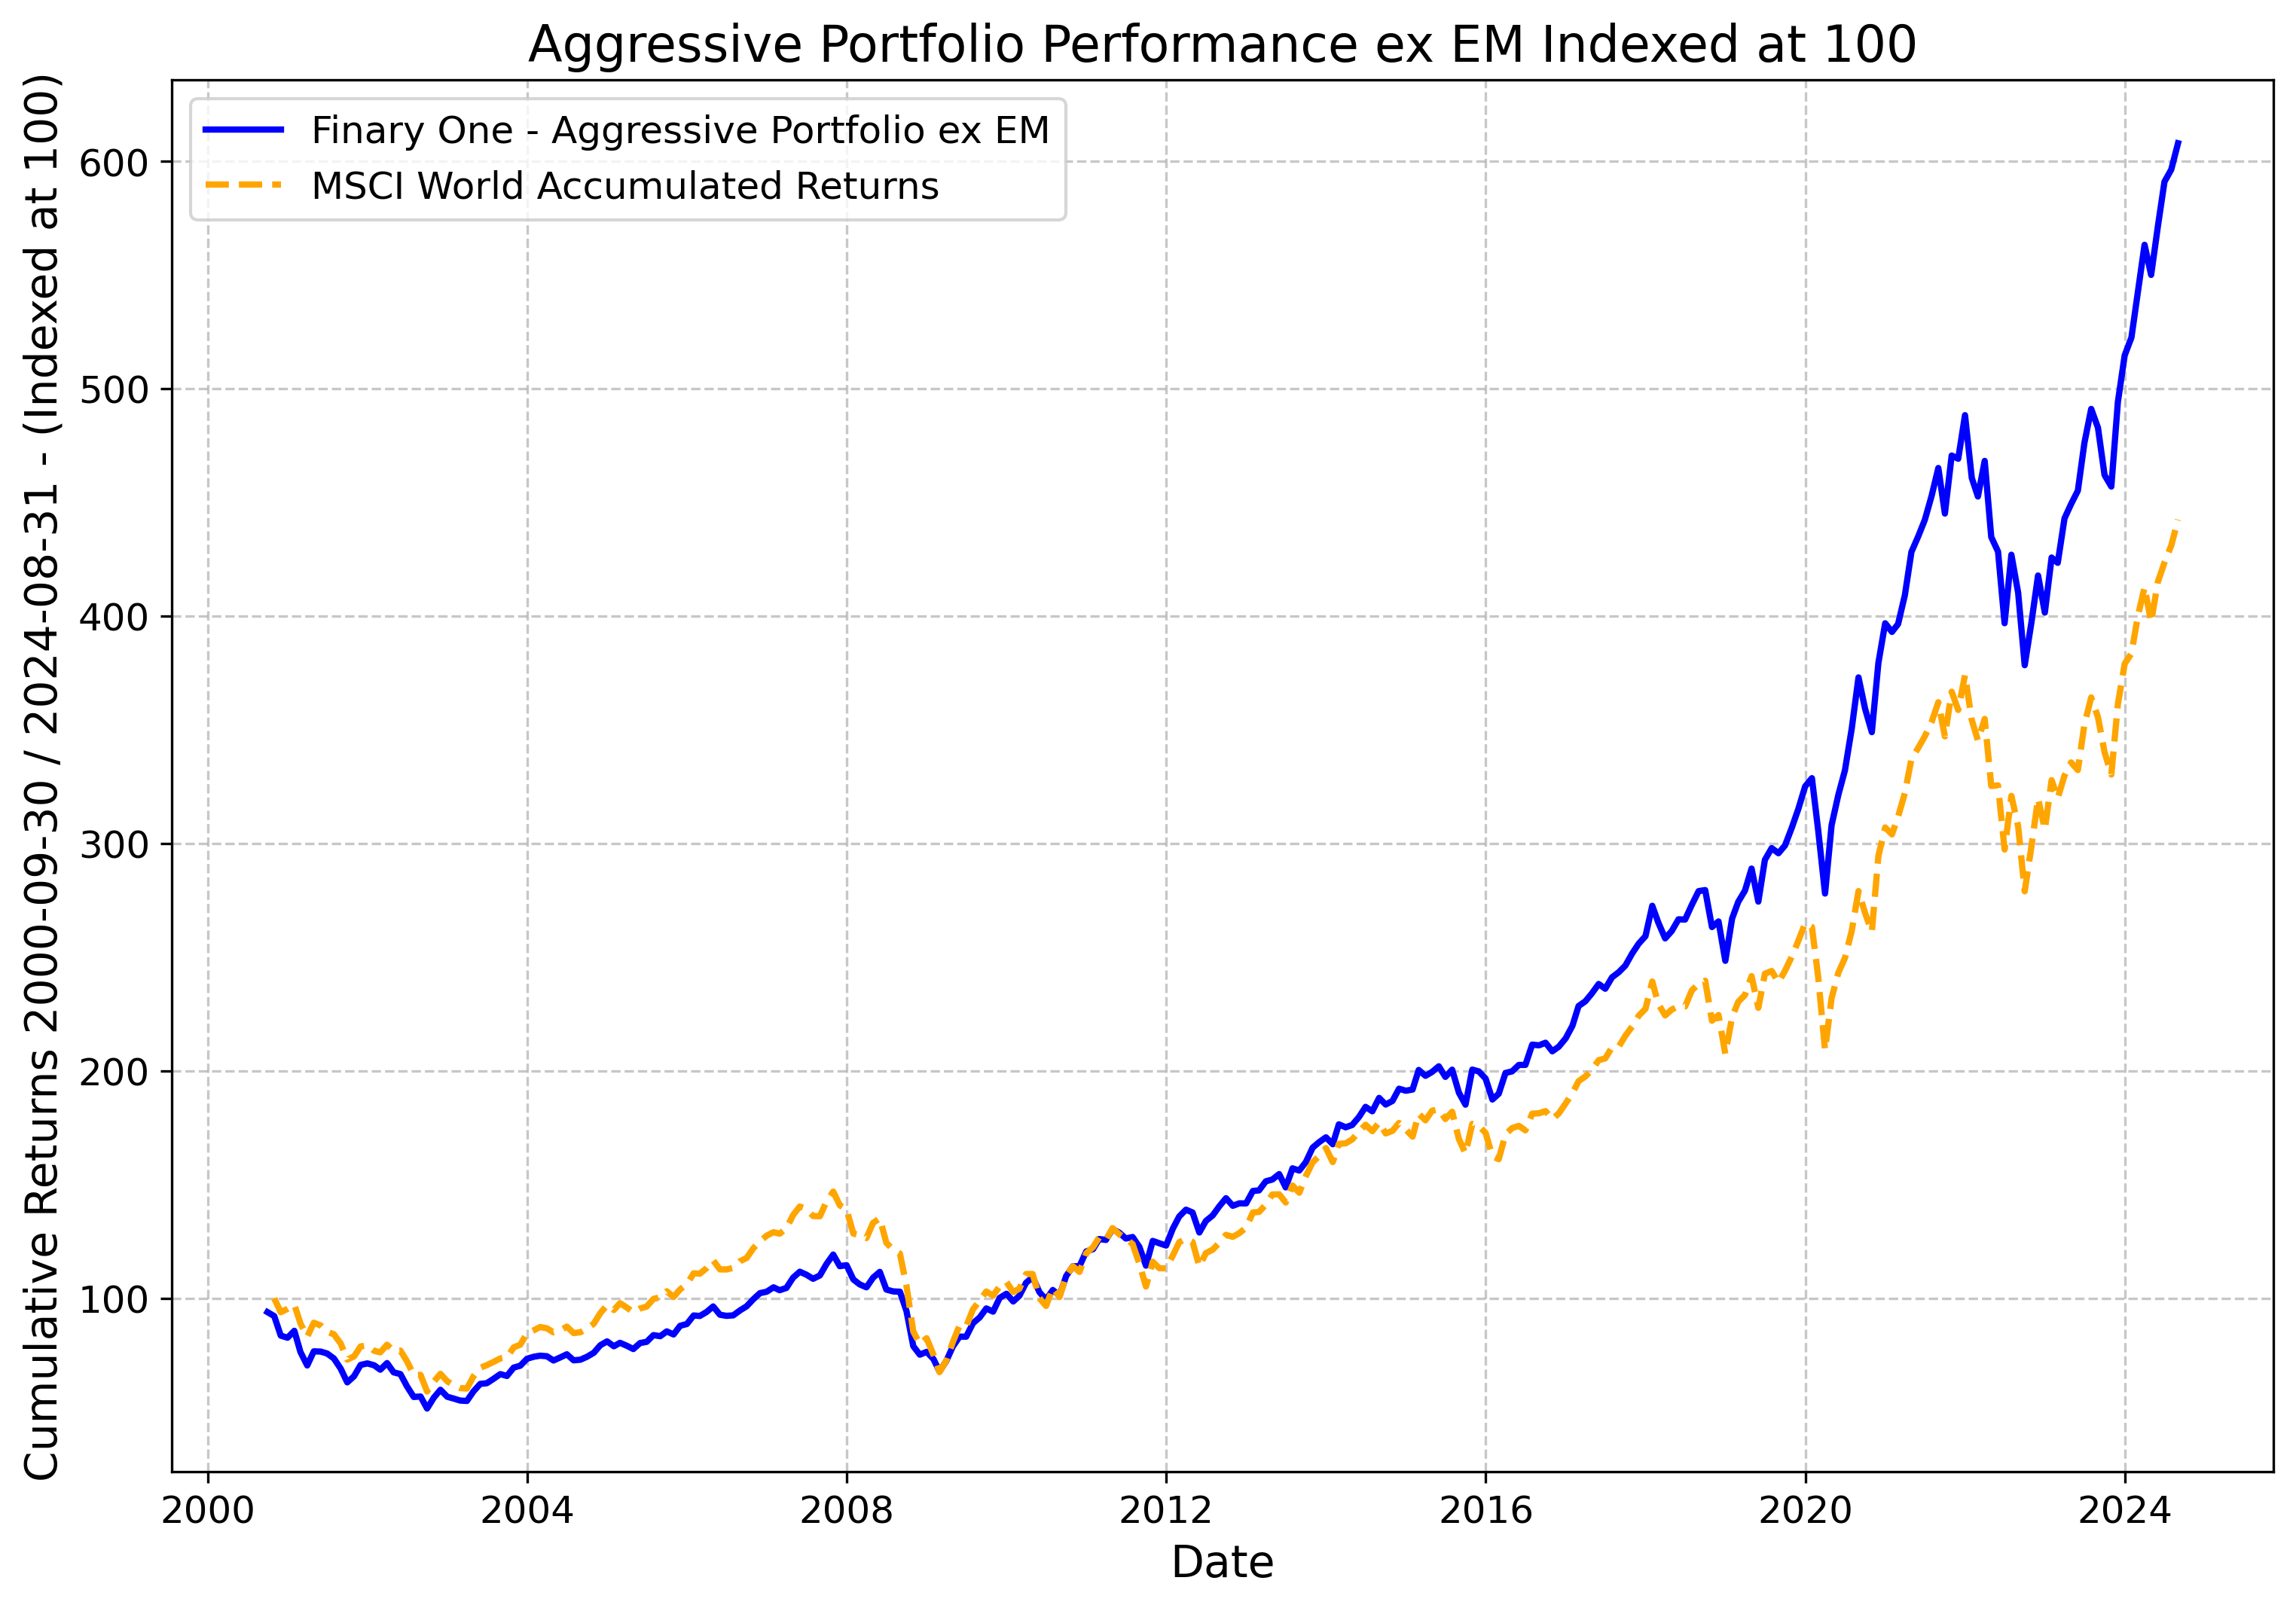

In [129]:
# Step 5: Define your portfolio weights
weights2 = [0.5, 0.2, 0, 0.15, 0.15]

# Ensure weights sum to 1 (optional if weights are already normalized)
weights = [w / sum(weights2) for w in weights2]

# Step 6: Compute the portfolio returns
portfolio_returns2 = returns_df.dot(weights2)

# Step 7: Index cumulative returns to 100 instead of 1
cumulative_returns_indexed2 = 100 * (1 + portfolio_returns2).cumprod()
msci_world_cumulative_returns_indexed = 100 * msci_world_cumulative_returns / msci_world_cumulative_returns.iloc[0]

# Step 8: Save everything in a variable called aggressive_portfolio
cumulative_returns_indexed2.index = pd.to_datetime(cumulative_returns_indexed2.index)

aggressive_portfolio2 = pd.DataFrame({
    'Portfolio_Returns': portfolio_returns,
    'Cumulative_Returns': cumulative_returns_indexed2
})

# Step 9: Plot the performance, indexed at 100
plt.figure(figsize=(12, 8), dpi=300)
plt.plot(cumulative_returns_indexed2, label='Finary One - Aggressive Portfolio ex EM', color='blue', linewidth=2)
plt.plot(msci_world_cumulative_returns_indexed, label='MSCI World Accumulated Returns', color='orange', linestyle='--', linewidth=2)
plt.title('Aggressive Portfolio Performance ex EM Indexed at 100', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Returns 2000-09-30 / 2024-08-31 - (Indexed at 100)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [106]:
global_stats2 = ffn.calc_stats(cumulative_returns_indexed2)
global_stats2.set_riskfree_rate(0.01)
global_stats2.display()

Stats for None from 2000-09-30 00:00:00 - 2024-08-31 00:00:00
Annual risk-free rate considered: 1.00%
Summary:
Total Return    Sharpe    CAGR    Max Drawdown
--------------  --------  ------  --------------
547.03%         -         8.12%   -45.14%

Annualized Returns:
mtd    3m     6m      ytd     1y      3y     5y      10y     incep.
-----  -----  ------  ------  ------  -----  ------  ------  --------
1.94%  6.38%  12.10%  18.13%  25.91%  9.33%  15.50%  12.44%  8.12%

Periodic:
        daily    monthly    yearly
------  -------  ---------  --------
sharpe  -        0.56       0.53
mean    -        8.81%      10.15%
vol     -        13.92%     17.31%
skew    -        -0.58      -0.99
kurt    -        1.01       0.48
best    -        10.82%     33.41%
worst   -        -16.34%    -33.28%

Drawdowns:
max      avg       # days
-------  ------  --------
-45.14%  -6.75%    183.48

Misc:
---------------  ------
avg. up month    3.17%
avg. down month  -3.24%
up year %        79.17%
12m up % 